<a href="https://colab.research.google.com/github/seeedata/SK-AI-Data-Academy/blob/main/SK%20hynix%20DRAM%20%EB%82%B4%EB%B6%80%20%ED%9A%8C%EB%A1%9C%EC%9D%98%20%ED%8C%8C%ED%98%95%20%EC%98%88%EC%B8%A1/%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B81%5D%20%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%20%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B3%A0%20%ED%8A%B9%EC%84%B1%20%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [프로젝트1] 데이터셋 불러오고 특성 알아보기


---


## 프로젝트 목표
---
- Pandas 라이브러리를 이용하여 전압 파형 데이터를 불러오고 정제해봅니다.
- 데이터 시각화를 통하여 입력 전압과 출력 전압의 관계를 이해해봅니다.
- 데이터를 머신러닝 모델 훈련에 사용할 수 있도록 정제해봅니다.
- 데이터를 정규화하는 전처리 과정을 수행해봅니다.


## 프로젝트 목차
---

1. **데이터 읽기:** 전압 파형 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 시각화:** 데이터 시각화를 통한 데이터 이해

3. **데이터 정제:** 비어 있는 데이터가 있는지 확인하고, 데이터를 numpy array 타입으로 변환

4. **데이터 전처리:** 머신러닝 모델을 효율적으로 학습하기 위하여 정규화 과정 수행


## 프로젝트 개요
---

이번 프로젝트에서는 전압 파형 데이터를 Pandas 라이브러리를 활용하여 불러오고, 이를 전처리 및 시각화 하는 과정을 수행해봅니다.

프로젝트에서 사용할 전압 파형 데이터는 시간 별 회로에 인가한 입력 전압과 그에 따른 5가지 출력 전압으로 구성되어 있습니다.

프로젝트의 목적은 입력 전압 파형을 보고, 출력 전압 파형을 예측하는 모델을 개발하는 것입니다.

그 첫번째 과정으로, 데이터를 불러오고 정제, 전처리 및 시각화 하는 실습을 수행해봅니다.


## 1. 데이터 읽기
---
가장 먼저, Pandas 라이브러리를 활용하여 데이터를 불러오고 그 구조를 확인해보겠습니다.


### 1.1 라이브러리 불러오기
---


In [ ]:
import pandas as pd

Pandas 라이브러리를 import 해줍니다. 라이브러리의 full name이 길기 때문에 편의를 위해 일반적으로 `as`를 사용하여 `pd`라는 별칭으로 import 합니다.

### 1.2 데이터 불러오기
---

pandas를 사용하여 데이터를 읽고 dataframe 형태로 저장해 봅시다. 데이터는 `./dataset` 디렉토리에 저장되어 있습니다. `SKHY_train.txt`는 학습에 사용할 데이터입니다. `SKHY_test_answer.txt`는 테스트에 사용할 데이터이며 출력 전압 값을 가지고 있습니다. `SKHY_test_noanswer.txt`는 `SKHY_test_answer.txt`와 입력 전압 값은 동일하지만, 출력 전압 값이 모두 `nan`입니다. 실무에서 테스트 데이터는 정답 label (여기에서는 출력 전압 값)을 포함하고 있지 않습니다. 그러나, 우리는 모델의 성능을 평가해보기 위해 정답이 있는 테스트 데이터를 사용해보겠습니다.


In [ ]:
df_train = pd.read_csv('./dataset/SKHY_train.txt', delimiter=',', header=0)
# 정답이 있는 테스트 데이터를 사용합니다.
df_test = pd.read_csv('./dataset/SKHY_test_answer.txt', delimiter=',', header=0)

`pandas`의 `read_csv` 함수를 사용하여 데이터를 불러옵니다. `delimeter`는 ,로 설정하고 `header`는 0으로 설정해줍니다.

In [ ]:
print('df_train type:', type(df_train))
print('df_test type:', type(df_test))

df_train type: <class 'pandas.core.frame.DataFrame'>
df_test type: <class 'pandas.core.frame.DataFrame'>


불러온 데이터의 형식을 확인해봅니다. dataframe type 임을 확인할 수 있습니다.

### 1.3 데이터 구조 확인
---

데이터 내부가 어떻게 구성되어 있는지 확인해봅시다.


In [ ]:
df_train

,TIME,Input_V,A,B,C,D,E
0,0.000000e+00,0.709757,0.814441,0.751554,0.742610,0.740106,0.739450
1,1.000000e-12,0.709757,0.814441,0.751554,0.742610,0.740106,0.739450
2,2.000000e-12,0.709757,0.814441,0.751554,0.742610,0.740106,0.739450
3,3.000000e-12,0.709757,0.814441,0.751554,0.742610,0.740106,0.739450
4,4.000000e-12,0.709757,0.814441,0.751554,0.742610,0.740106,0.739450
...,...,...,...,...,...,...,...
452278,4.522850e-07,0.752925,0.826565,0.717021,0.700614,0.703135,0.713045
452279,4.522860e-07,0.752698,0.825935,0.717037,0.700707,0.703177,0.713033
452280,4.522870e-07,0.752453,0.825376,0.717053,0.700800,0.703219,0.713022
452281,4.522880e-07,0.752208,0.824817,0.717076,0.700894,0.703261,0.713011


In [ ]:
df_test

,TIME,Input_V,A,B,C,D,E
0,4.522900e-07,0.751717,0.823699,0.717139,0.701082,0.703345,0.712989
1,4.522910e-07,0.751471,0.823143,0.717171,0.701176,0.703387,0.712979
2,4.522920e-07,0.751201,0.822669,0.717211,0.701269,0.703427,0.712968
3,4.522930e-07,0.750931,0.822194,0.717252,0.701361,0.703467,0.712957
4,4.522940e-07,0.750660,0.821720,0.717294,0.701452,0.703507,0.712946
...,...,...,...,...,...,...,...
193831,6.461210e-07,0.710124,0.814109,0.751601,0.742675,0.740137,0.739450
193832,6.461220e-07,0.710139,0.814118,0.751608,0.742681,0.740141,0.739453
193833,6.461230e-07,0.710154,0.814127,0.751614,0.742687,0.740146,0.739456
193834,6.461240e-07,0.710171,0.814139,0.751621,0.742692,0.740149,0.739459


`df_train`과 `df_test`를 출력해봅니다. 학습 데이터는 452283 개, 테스트 데이터는 193836 개의 행으로 구성되어 있으며, 7 개의 열이 있습니다. 첫번째 열은 시간이고, 두번째 열은 입력 전압값, 세번째~일곱번째 열은 출력 전압값을 의미합니다.

## 2. 데이터 시각화
---

첫번째 단계에서 불러온 데이터를 시각화하여, 데이터 분포를 확인해봅니다.

### 2.1 라이브러리 불러오기
---

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

시각화를 위한 툴인 matplotlib을 import 해줍니다.

### 2.2 단일 플롯 그래프 그리기
---
첫번째 단계에서 불러온 그래프를 시각화해봅니다. 하나의 plot에 입력전압과 출력전압의 변화를 그려보겠습니다.

In [ ]:
fig = plt.figure(figsize = (10,5))

<Figure size 720x360 with 0 Axes>

그래프가 그려질 figure을 생성합니다. figure의 사이즈는 가로 10, 세로 5로 지정해줍니다.

Text(0, 0.5, 'Values')

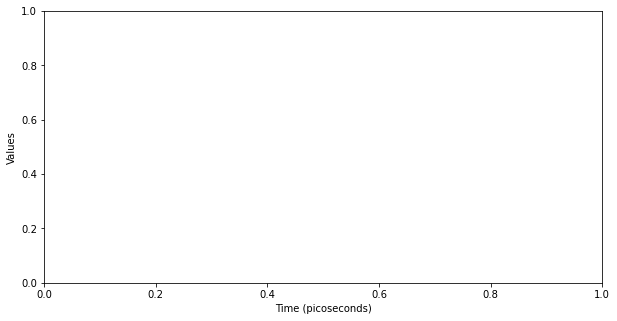

In [ ]:
fig = plt.figure(figsize = (10,5))

plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')

그래프의 x축, y축의 label을 설정해줍니다.

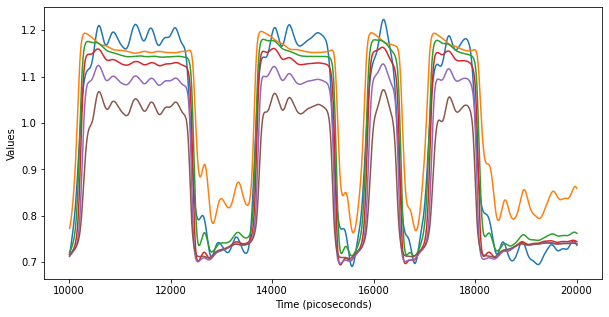

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')

start_i, end_i = 10000, 20000
picoseconds = df_train.iloc[start_i:end_i, 0] * 1e+12 # 첫번째 열의 데이터는 시간을 나타냅니다.
for i in range(1, len(df_train.columns)):
    plt.plot(picoseconds, df_train.iloc[start_i:end_i, i], label = df_train.columns[i]) # 두번째 열부터의 데이터는 전압값을 나타냅니다.

학습데이터의 분포를 그래프에 그려봅니다. 모든 데이터를 시각화하면 너무 복잡해지기 때문에 `start_i`부터 `end_i` 행 까지의 데이터만 시각화해보겠습니다. dataframe의 `iloc` 함수를 사용하여 입력된 index에 해당하는 값들을 얻을 수 있습니다. x 축을 시간축으로 만들기 위해 첫번째 열의 데이터에 $10^{12}$ 를 곱하여 `picoseconds` 변수를 만들어줍니다. y 축은 전압값을 의미하도록 하기 위해 dataframe의 두번째 열부터 마지막 열까지 반복하여 그래프를 그려줍니다. `legend`(범례)에는 열의 header 이름을 넣어줍니다.

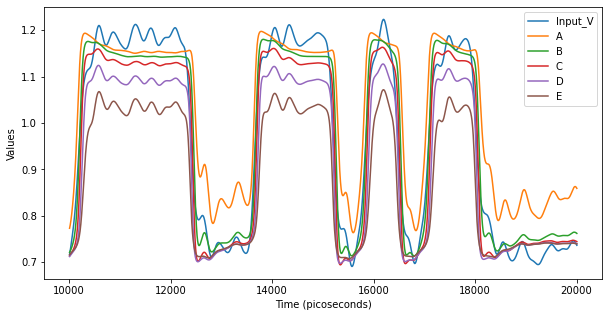

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
start_i, end_i = 10000, 20000
picoseconds = df_train.iloc[start_i:end_i, 0] * 1e+12 # 첫번째 열의 데이터는 시간을 나타냅니다.
for i in range(1, len(df_train.columns)):
    plt.plot(picoseconds, df_train.iloc[start_i:end_i, i], label = df_train.columns[i]) # 두번째 열부터의 데이터는 전압값을 나타냅니다.

plt.legend(loc = 'upper right') # 범례가 오른쪽 위에 위치하도록 합니다.
plt.show()

마지막으로 범례의 위치를 설정해준 후, `plot.show()`를 이용하여 그래프를 출력합니다. 입력 전압 (`input_V`)과 출력 전압(`A`~`E`)의 경향은 유사하나 약간의 차이가 존재하는 것을 확인할 수 있습니다. 우리의 목표는 입력 전압으로부터 출력 전압을 예측하는 모델을 생성하는 것입니다.

## [TODO] 테스트 데이터를 시각화하는 코드를 작성하세요.

학습용 데이터의 10,000\~20,000 행의 데이터를 시각화하는 코드를 작성해보았습니다. 이번에는, 바로 위의 코드셀의 코드를 수정하여, 테스트용 데이터의 20,000\~50,000 행의 데이터를 시각화하는 코드를 작성해보세요. 그리고, 범례는 왼쪽 아래에 위치하도록 해보세요. 아래 그림과 같은 그래프가 출력되어야 합니다.

<img src="./images/TODO1.png" width="50%">

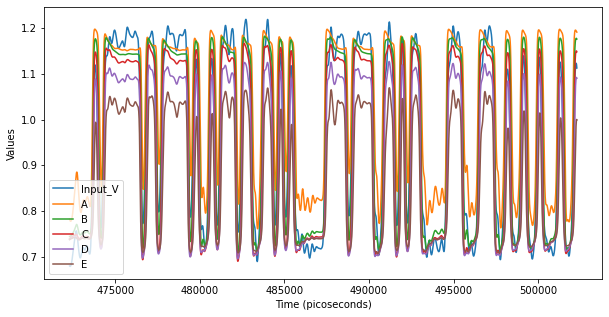

In [ ]:
# 테스트 데이터의 그래프 출력
fig = plt.figure(figsize = (10,5))
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
start_i, end_i = 20000, 50000
picoseconds = df_test.iloc[start_i:end_i, 0] * 1e+12
for i in range(1, len(df_test.columns)):
    # TODO: 테스트 데이터의 입력 전압과 출력 전압을 선그래프로 나타냅니다.
    plt.plot(picoseconds, df_test.iloc[start_i:end_i, i], label=df_test.columns[i])
# TODO: 범례를 왼쪽 아래에 위치하도록 합니다.
plt.legend(loc='lower left')
plt.show()

### 2.3 다중 플롯 그래프 그리기
---
이번에는 여러개의 plot에 각각의 전압값 그래프를 그려보겠습니다.

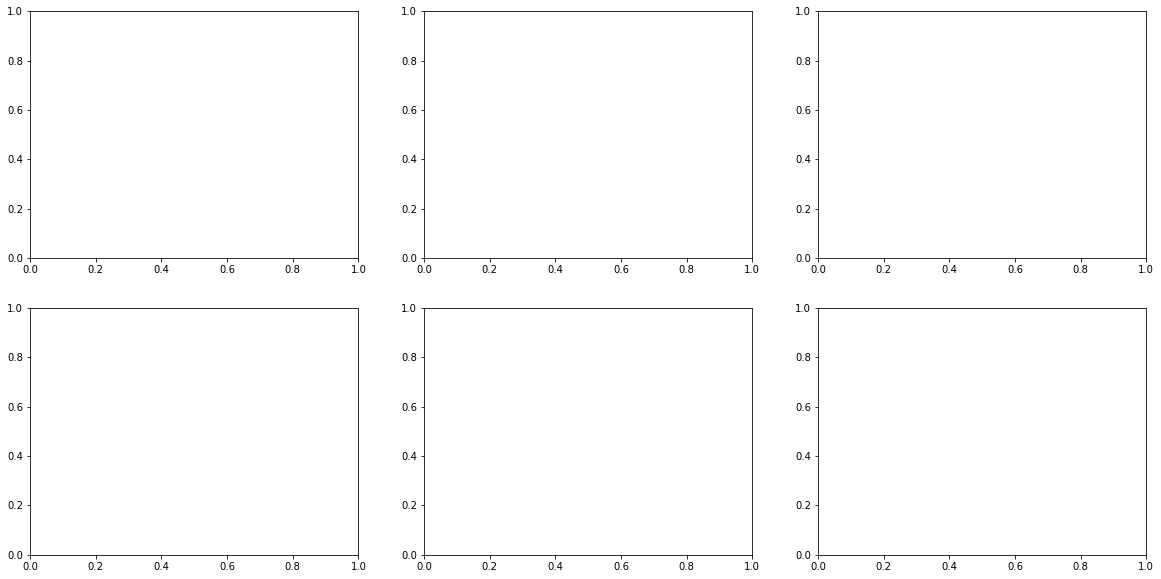

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))

여러개의 plot을 만들기 위해 `plt.subplots` 함수를 사용해줍니다. plot이 2행 3열로 배치되게 하고, figure의 사이즈는 가로 20, 세로 10으로 설정해줍니다.

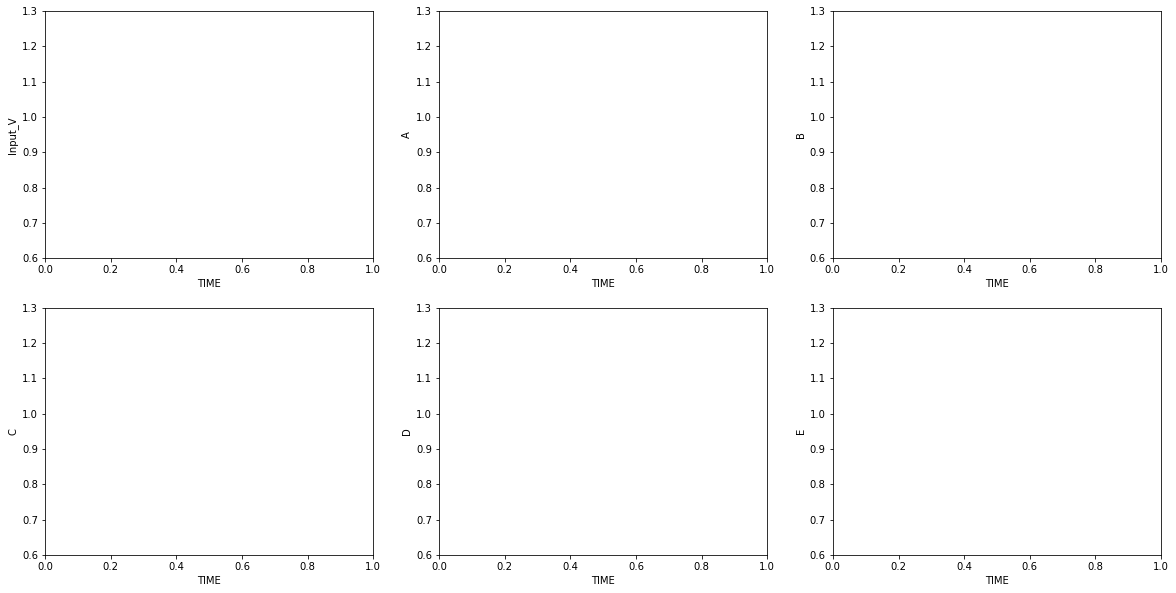

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))

start_i, end_i = 10000, 20000
for h in range(axes.shape[0]):
    for w in range(axes.shape[1]):
        ax = axes[h, w]
        ax.set_xlabel(df_train.columns[0])
        # h행, w열의 subplot의 y축 label은 dataframe의 h * 3 + w + 1 번째 열의 header 이름으로 설정합니다.
        ax.set_ylabel(df_train.columns[h * axes.shape[1] + w +1])
        ax.set_ylim(0.6, 1.3)

이번에도 `start_i`행부터 `end_i`행까지만 그리기 위하여 미리 값을 설정합니다. `axes`는 figure를 구성하는 각 subplot의 array이며, shape은 행의 개수 $\times$ 열의 개수입니다. 각 subplot의 x축의 label은 dataframe의 첫번째 열의 header의 이름인 TIME으로 설정하고, y축 label은 dataframe의 두번째 열부터 마지막 열까지의 header 이름으로 설정합니다. 마지막으로, y의 범위를 0.6에서 1.3 사이로 고정하겠습니다.

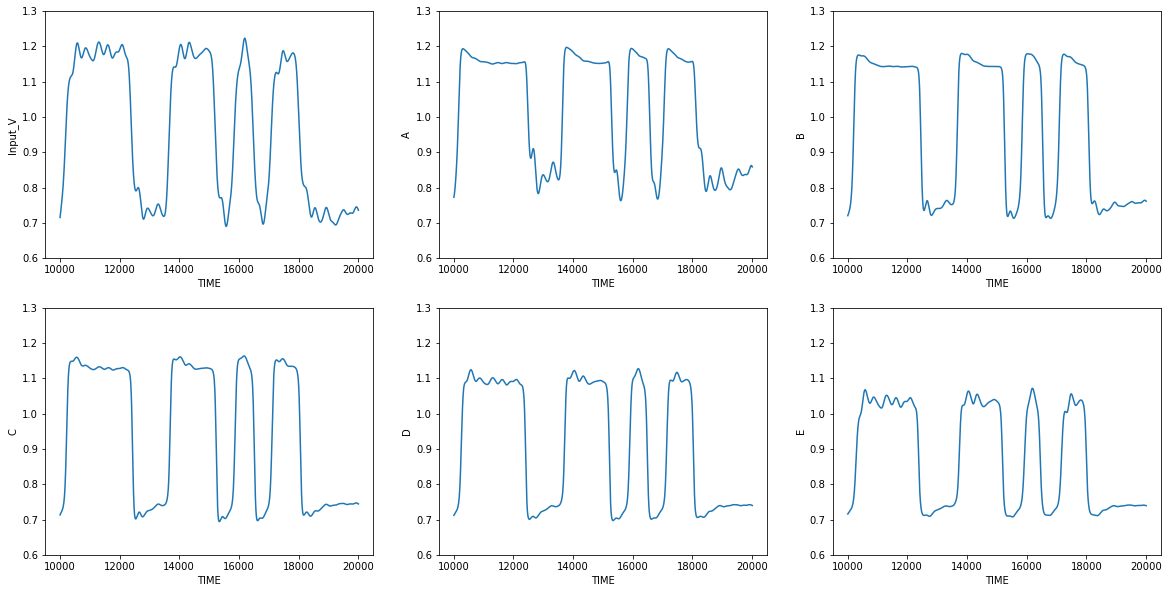

In [ ]:
fig, axes = plt.subplots(2, 3, figsize = (20,10))
start_i, end_i = 10000, 20000
for h in range(axes.shape[0]):
    for w in range(axes.shape[1]):
        ax = axes[h, w]
        ax.set_xlabel(df_train.columns[0])
        # h행, w열의 subplot의 y축 label은 dataframe의 h * 3 + w + 1 번째 열의 header 이름으로 설정합니다.
        ax.set_ylabel(df_train.columns[h * axes.shape[1] + w +1])
        ax.set_ylim(0.6, 1.3)

        ax.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, df_train.iloc[start_i:end_i, h * axes.shape[1] + w +1])
plt.show()

마지막으로, 각 subplot에 x축은 시간, y축은 전압값이 되도록 그래프를 그려줍니다.

## 3. 데이터 정제
---
dataframe에 결측치가 없는지 확인하고, 머신러닝 모델 훈련에 사용할 수 있도록 numpy array 형식으로 변환해줍니다.

### 3.1 라이브러리 불러오기
---


In [ ]:
import numpy as np

numpy 라이브러리를 `np`라는 별칭으로 import 해줍니다.

### 3.2 결측치 확인
---
결측치란 값이 없는 것을 의미합니다. dataframe 내에 빈칸이 있지 않은지 검증해봅니다.

In [ ]:
print('train data에 NaN 포함 여부:', df_train.isnull().values.any())
print('test data에 NaN 포함 여부:', df_test.isnull().values.any())

train data에 NaN 포함 여부: False
test data에 NaN 포함 여부: False


불러온 dataframe에 빈 칸이 포함되어 있는지 확인합니다. 빈 칸이 없음을 확인했습니다.

### 3.3 데이터를 numpy array 타입으로 변환하기
---
pandas의 dataframe 데이터를 numpy array 형식의 데이터로 변환합니다. 이 때, 학습용 데이터를 학습용과 검증용 데이터로 나누어줍니다.

In [ ]:
train_valid_ratio = 0.9 # 학습용 데이터와 검증용 데이터의 비율을 9:1로 설정합니다.
train_len = int(df_train.shape[0] * train_valid_ratio)
valid_len = df_train.shape[0] - train_len
test_len = df_test.shape[0]
print('#train: {}, #valid: {}, #test: {}'.format(train_len, valid_len, test_len))

#train: 407054, #valid: 45229, #test: 193836


학습용 데이터와 검증용 데이터의 비율을 9:1로 설정해줍니다. 그리고, 학습용, 검증용, 그리고 테스트용 데이터의 수를 출력해봅니다.

In [ ]:
train_data = {
    'time': df_train.iloc[:, 0].values[:train_len],
    'X': df_train.iloc[:, 1].values[:train_len],
    'y': df_train.iloc[:, 2:].values[:train_len]
}
valid_data = {
    'time': df_train.iloc[:, 0].values[train_len:],
    'X': df_train.iloc[:, 1].values[train_len:],
    'y': df_train.iloc[:, 2:].values[train_len:]
}
test_data = {
    'time': df_test.iloc[:, 0].values,
    'X': df_test.iloc[:, 1].values,
    'y': df_test.iloc[:, 2:].values
}

학습용, 검증용, 테스트용 데이터를 저장하는 3개의 dictionary 변수를 만들어줍니다. 각 dictionary는 시간을 의미하는 `time`, 입력 전압을 의미하는 `X`, 출력 전압을 의미하는 `y`의 3가지 key를 가지고 있습니다. dataframe의 `iloc`을 이용하여 특정 열의 값을 추출하고, `values`를 이용하여 numpy array로 형변환 해줍니다.

In [ ]:
print('학습용 데이터의 time: {}, X: {}, y: {}'.format(train_data['time'].shape, train_data['X'].shape, train_data['y'].shape))
print('검증용 데이터의 time: {}, X: {}, y: {}'.format(valid_data['time'].shape, valid_data['X'].shape, valid_data['y'].shape))
print('테스트용 데이터의 time: {}, X: {}, y: {}'.format(test_data['time'].shape, test_data['X'].shape, test_data['y'].shape))

학습용 데이터의 time: (407054,), X: (407054,), y: (407054, 5)
검증용 데이터의 time: (45229,), X: (45229,), y: (45229, 5)
테스트용 데이터의 time: (193836,), X: (193836,), y: (193836, 5)


각 dictionary 내부 값들의 shape을 출력해봅니다.

## 4. 데이터 전처리
---
머신러닝 모델의 학습을 효과적으로 하기 위해 데이터를 적절히 전처리 해봅니다. 여기서는 데이터를 정규화해보겠습니다.

### 4.1 입력 전압 데이터의 정규화
---


In [ ]:
X_mean = train_data['X'].mean()
X_std = train_data['X'].std()
print('학습용 데이터 X의 평균: {}, 표준편차: {}'.format(X_mean, X_std))

학습용 데이터 X의 평균: 0.9539435514452631, 표준편차: 0.18720266699633664


학습용 데이터의 입력 데이터 (`X`)의 평균과 표준편차를 구합니다.

In [ ]:
X_train = (train_data['X'] - X_mean) / X_std
X_train = X_train.reshape(-1, 1)

학습용 데이터에서 평균을 빼고 표준편차로 나누어 데이터를 정규화합니다. 또한, 일반적인 머신러닝 모델에 사용할 수 있게끔 (데이터의 개수, 1) 의 shape으로 변환해줍니다.

In [ ]:
X_valid = (valid_data['X'] - X_mean) / X_std
X_valid = X_valid.reshape(-1, 1)

X_test = (test_data['X'] - X_mean) / X_std
X_test = X_test.reshape(-1, 1)

마찬가지로 검증용 데이터와 테스트용 데이터도 정규화 해줍니다. 이 때, 평균과 표준편차는 훈련용 데이터에서 구한 값을 사용합니다.

### 4.2 출력 전압 데이터의 정규화
---


In [ ]:
y_mean = train_data['y'].mean(axis=0)
y_std = train_data['y'].std(axis=0)
print('학습용 데이터 X의 평균: {}, 표준편차: {}'.format(y_mean, y_std))

학습용 데이터 X의 평균: [1.03309848 0.96738386 0.93425816 0.89572486 0.85570616], 표준편차: [0.15680612 0.19285169 0.19235427 0.17190273 0.13654631]


이번에는 학습용 데이터의 출력 데이터 (`y`)의 평균과 표준편차를 구합니다. y는 다변량 데이터이므로 `axis=0`으로 설정하여 각 변수 마다의 통계값을 계산합니다.

In [ ]:
y_train = (train_data['y'] - y_mean) / y_std

학습용 출력 데이터를 정규화해줍니다.

## [TODO] 검증용, 테스트용 데이터를 정규화하는 코드를 작성하세요.

검증용과 테스트용 데이터를 학습용 데이터의 평균 (`y_mean`)과 표준편차 (`y_std`)를 이용하여 정규화해보세요.

In [ ]:
# 검증용 출력 데이터 정규화
y_valid =  (valid_data['y'] - y_mean) / y_std
# 테스트용 출력 데이터 정규화
y_test = (test_data['y'] - y_mean) / y_std

### 4.3 정규화된 데이터 시각화
---
정규화한 데이터를 시각화해보겠습니다.

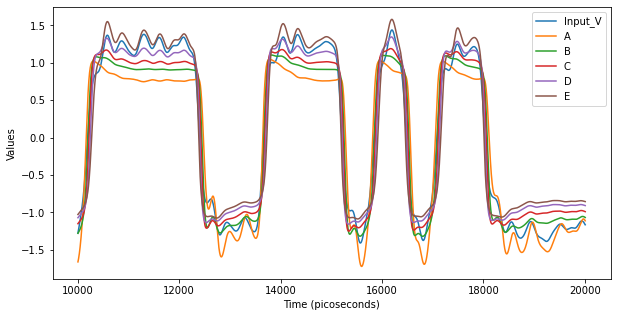

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.xlabel('Time (picoseconds)')
plt.ylabel('Values')
for i, data in enumerate(np.concatenate([X_train, y_train], axis=1).transpose()):
    plt.plot(df_train.iloc[start_i:end_i, 0] * 1e+12, data[start_i:end_i], label = df_train.columns[i+1])
plt.legend(loc = 'upper right')
plt.show()

데이터의 전압값이 0 주변으로 정규화되었으며, 각 전압값 사이의 차이가 줄어든 것을 확인할 수 있습니다.

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>

---